In [41]:
import sys
sys.path.append("C:\\Users\\cc_ca\\OneDrive\\Escritorio\\Desarrollo web\\Analisis de Datos\\Python\\Scripts\\.venv\\Lib\\site-packages")
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

### SECOP II - Procesos de Contratación

## Objetivo:
#### Determinar cómo se ha comportado el consumo del estado colombiano en los últimos 4 años, identificando las entidades que tienen un mayor gasto, y en que regiones se observa una mayor inversión.

In [42]:
# Leer el archivo csv ubicado en la ruta especificada y asigna los datos a la variable df_resultados
try:
    df_secop  = pd.read_csv('C:\\Users\\cc_ca\\Downloads\\SECOP_II_-_Procesos_de_Contrataci_n_20240522.csv')
# Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print('La API fue consumida exitosamente')
# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileNotFoundError as e:
    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f'Error: La API no se puede consumir. Detalles:{e}')
# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as ex:
    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f'Error: La API no se puede consumir. Detalles: {ex}')

C:\Users\cc_ca\AppData\Local\Temp\ipykernel_16692\2758845852.py:3: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_secop  = pd.read_csv('C:\\Users\\cc_ca\\Downloads\\SECOP_II_-_Procesos_de_Contrataci_n_20240522.csv')


La API fue consumida exitosamente


In [43]:
# Crear un DataFrame nuevo utilizando los datos exitentes del dataset
df_secop_ = pd.DataFrame(df_secop)

In [44]:
# Identificación de porcentajes faltantes por columnas
df_secop = df_secop_.replace(r'^\s*$', np.nan, regex=True)
percent_missing = df_secop.isnull().sum() * 100 / len(df_secop)
missing_value_df = pd.DataFrame({'Columnas': df_secop.columns,
                                 'Porcentajes_vacios': percent_missing})
missing_value_df.sort_values(by="Porcentajes_vacios", ascending= False).reset_index(drop=True)

,Columnas,Porcentajes_vacios
0,Fecha de Publicacion (Fase Seleccion Precalifi...,99.999838
1,Fecha de Publicacion (Fase Planeacion Precalif...,99.999802
2,Fecha de Publicacion (Manifestacion de Interes),99.273142
3,Fecha de Publicacion (Fase Borrador),98.226916
4,Fecha Adjudicacion,83.348303
5,Fecha de Apertura de Respuesta,78.861379
6,Fecha de Apertura Efectiva,76.871980
7,Fecha de Recepcion de Respuestas,75.678316
8,Fecha de Publicacion (Fase Seleccion),4.868857
9,Fecha de Publicacion del Proceso,2.368554


In [78]:
# Eliminar columnas
df = df_secop.drop(columns=['Fecha Adjudicacion','Fecha de Publicacion (Fase Borrador)','Fecha de Apertura de Respuesta',
                            'Fecha de Publicacion (Manifestacion de Interes)','Fecha de Apertura Efectiva','Fecha de Publicacion (Fase Planeacion Precalificacion)', 'Fecha de Publicacion (Fase Seleccion Precalificacion)',
                            'Fecha de Publicacion (Fase Planeacion Precalificacion)','Fecha de Publicacion (Fase Seleccion)','Fecha de Recepcion de Respuestas','Entidad Centralizada','ID del Proceso','PCI', 'ID del Portafolio',
                            'Nombre del Procedimiento', 'Proveedores Invitados', 'Proveedores con Invitacion Directa', 'Visualizaciones del Procedimiento', 'Proveedores que Manifestaron Interes',
                            'Respuestas al Procedimiento', 'Respuestas Externas', 'Conteo de Respuestas a Ofertas', 'Proveedores Unicos con Respuestas', 'Numero de Lotes', 'Fecha Adjudicacion',
                            'Nombre del Adjudicador','Nombre de la Unidad de Contratación' ,'Subtipo de Contrato','Justificación Modalidad de Contratación' ,'Categorias Adicionales', 'Descripción del Procedimiento','URLProceso', 'Codigo Entidad', 'Fecha de Ultima Publicación'])

In [46]:
# Renombrar columnas, ya que al descargar el CSV, nos damos cuenta que el precio base lo toma como valor de total de adjudicación.

# Cambiar los nombres de las columnas
#df.rename(columns={
#    'Precio Base': 'Valor Total Adjudicacion',
#    'Valor Total Adjudicacion': 'Precio Base'
#}, inplace=True)

In [47]:
# Identificación de porcentajes faltantes por columnas
df = df.replace(r'^\s*$', np.nan, regex=True)
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentajes_vacios': percent_missing})
missing_value_df.sort_values(by="Porcentajes_vacios", ascending= False).reset_index(drop=True)

,Columnas,Porcentajes_vacios
0,Fecha de Publicacion del Proceso,2.368554
1,Fase,1.029562
2,NIT del Proveedor Adjudicado,0.000721
3,Nombre del Proveedor Adjudicado,0.000379
4,Referencia del Proceso,0.000216
5,Entidad,0.000000
6,Adjudicado,0.000000
7,Tipo de Contrato,0.000000
8,Estado de Apertura del Proceso,0.000000
9,Codigo Principal de Categoria,0.000000


Referencia del Proceso --> Se eliminaran registros CCENEG
Descripción del Procedimiento (Información que es dificil de mostrar)
Justificación Modalidad de Contratación
Duracion revisar concatenar con Unidad de duracion dejarlo en Dias
CodigoProveedor 
Ciudad Proveedor 
Valor Total Adjudicacion (Revisar por que la mayoria es 0)
Nombre del Proveedor Adjudicado
NIT del Proveedor Adjudicado

In [79]:
#Reemplazar Valor_Cambiar por Valor, se asigna codigo para servicios de personal temporal (Cotratación directa).
Valor = 'V1.10100000'
Valor_Cambiar = 'UNSPECIFIED'
df['Codigo Principal de Categoria'] = df['Codigo Principal de Categoria'].replace(Valor_Cambiar,Valor)

In [80]:
#Reemplazar Departamento entidad por valor, se asigna un nombre mas corto para Bogotá.
Valor = 'Bogotá D.C.'
Valor_Cambiar = 'Distrito Capital de Bogotá'
df['Departamento Entidad'] = df['Departamento Entidad'].replace(Valor_Cambiar,Valor)

In [81]:
# Concatenar columnas Unidad y Unidad de duración y se convierten a meses.

# Función para convertir la duración a meses
def convertir_a_meses(row):
    duracion = row['Duracion']
    unidad = row['Unidad de Duracion']

    if unidad == 'Hora(s)':
        return duracion / (24 * 30.4375)  # Convertir horas a meses
    elif unidad == 'día(s)':
        return duracion / 30.4375  # Convertir días a meses
    elif unidad == 'Semana(s)':
        return duracion * (7 / 30.4375)  # Convertir semanas a meses
    elif unidad == 'Mes(es)':
        return duracion  # La duración ya está en meses
    elif unidad == 'Año(s)':
        return duracion * 12  # Convertir años a meses
    else:
        return None  # O puedes decidir devolver 0 u otro valor

    
df['Duracion_Meses_Contrato'] = df.apply(convertir_a_meses, axis=1)


In [82]:
#Eliminamos la columna Duración, Unidad de Duración
df = df.drop(columns=['Duracion', 'Unidad de Duracion'])

In [52]:
#Identificar valores únicos por columna
print('\n Valores unicos por columna: ')
for column in df:
    unique_values = df[column].unique()
    print(f'\n{column} ({len(unique_values)} valores unicos:\n{unique_values[:10]})')
    if len(unique_values) > 10:
        print('....')


 Valores unicos por columna: 

Entidad (10415 valores unicos:
['MUNICIPIO DE ARMENIA QUINDIO'
 'DEPARTAMENTO ADMINISTRATIVO DE LA PRESIDENCIA DE LA REPÚBLICA'
 'ALCALDIA LOCAL DE SUMAPAZ' 'INVIAS'
 'DISTRITO ESPECIAL INDUSTRIAL Y PORTUARIO DE BARRANQUILLA'
 'INSTITUTO DE DEPORTES Y RECREACION DE MEDELLIN'
 'INSTITUTO TERMAL DE PAIPA' 'ALCALDIA DE TURBACO BOLIVAR'
 'SENA REGIONAL BOLIVAR Grupo de Apoyo Administrativo Mixto'
 'SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E.'])
....

Nit Entidad (10273 valores unicos:
['890000464' '899999083' '899999061' '800215807' '890102018' '800194096'
 '826000214' '890481149' '899999034' '900958564'])
....

Departamento Entidad (34 valores unicos:
['Quindío' 'Bogotá D.C.' 'Atlántico' 'Antioquia' 'Boyacá' 'Bolívar'
 'Casanare' 'Magdalena' 'Cundinamarca' 'Córdoba'])
....

Ciudad Entidad (994 valores unicos:
['Armenia' 'Bogotá' 'Barranquilla' 'Medellín' 'Paipa' 'Turbaco'
 'Cartagena' 'Yopal' 'Santa Marta' 'Sabanas De San Angel'])
....

OrdenEntidad (

CCENEG por que los eliminamos?

In [83]:
# Filtrar el DataFrame para eliminar las filas que contienen 'CCENEG' en la columna 'Referencia del Proceso'
# Rellenar NaN temporalmente con un valor que no interfiera, por ejemplo, ''
df['Referencia del Proceso'].fillna('No Aplica', inplace=True)
df_filtrado = df[~df['Referencia del Proceso'].str.contains('CCENEG')]

C:\Users\cc_ca\AppData\Local\Temp\ipykernel_16692\779650464.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Referencia del Proceso'].fillna('No Aplica', inplace=True)


In [84]:
#Convertir a fecha la columna Fecha de Publicacion del Proceso
df_filtrado['Fecha de Publicacion del Proceso'] = pd.to_datetime(df_filtrado['Fecha de Publicacion del Proceso'], errors = 'coerce')

C:\Users\cc_ca\AppData\Local\Temp\ipykernel_16692\1301380335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Fecha de Publicacion del Proceso'] = pd.to_datetime(df_filtrado['Fecha de Publicacion del Proceso'], errors = 'coerce')


In [85]:
#Eliminamos los registros que sean menores a la fecha limite
fecha_limite = pd.Timestamp('2019-01-01')
df_filtrado = df_filtrado[df_filtrado['Fecha de Publicacion del Proceso'] >= fecha_limite]
df_filtrado['Fecha de Publicacion del Proceso']

0         2023-06-27
1         2022-11-25
2         2019-04-29
3         2019-09-30
4         2023-04-12
             ...    
5544685   2022-10-31
5544686   2019-02-03
5544687   2021-02-05
5544688   2023-07-12
5544689   2021-09-09
Name: Fecha de Publicacion del Proceso, Length: 4950257, dtype: datetime64[ns]

In [86]:
#Filtrar valores en 0 en la columna Valor Total Adjudicacion.
df_filtrado = df_filtrado[df_filtrado['Valor Total Adjudicacion'] > 0]

### 1. Tendencia del Gasto Anual
- Descripción: Muestra el gasto total del estado colombiano por año.
- Eje X: Años
- Eje Y: Gasto Total

### Valor Total de Adjudicación

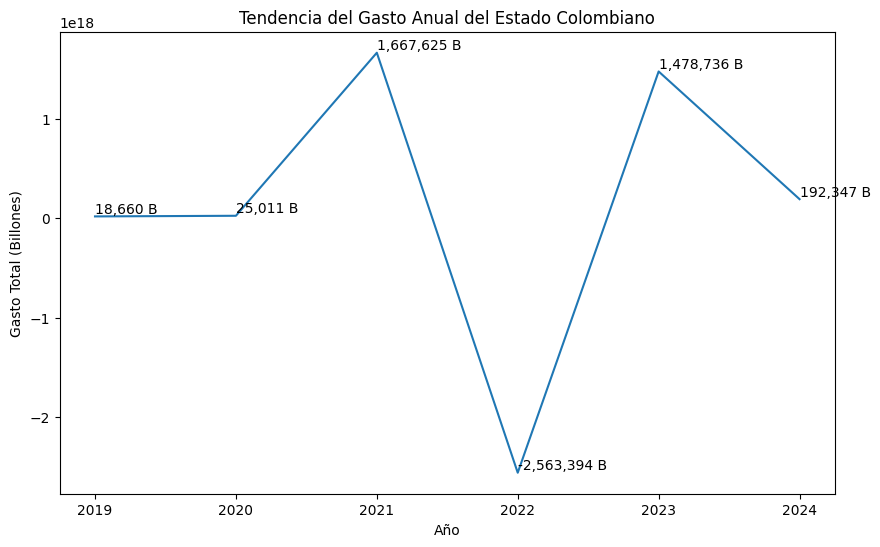

In [88]:
#Calculo del Gasto Anual
df_filtrado['Año'] = pd.to_datetime(df_filtrado['Fecha de Publicacion del Proceso']).dt.year
gasto_anual = df_filtrado.groupby('Año')['Valor Total Adjudicacion'].sum()

#Grafica
plt.figure(figsize=(10, 6))
gasto_anual.plot(kind='line')

# Agregar los valores en cada punto
for año, gasto in gasto_anual.items():
    plt.text(año, gasto, f'{gasto/1e12:,.0f} B', ha='left', va='bottom')

plt.title('Tendencia del Gasto Anual del Estado Colombiano')
plt.xlabel('Año')
plt.ylabel('Gasto Total (Billones)')
plt.show()

### Precio Base

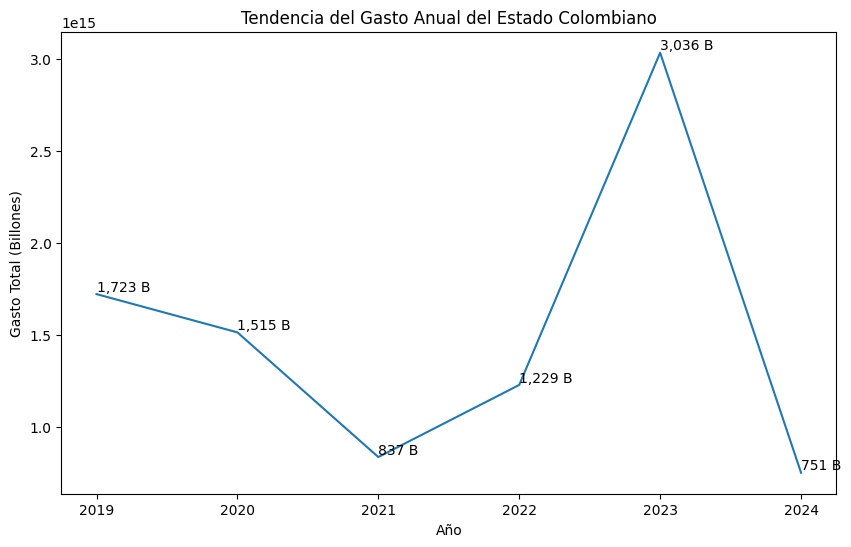

In [89]:
#Calculo del Gasto Anual
df_filtrado['Año'] = pd.to_datetime(df_filtrado['Fecha de Publicacion del Proceso']).dt.year
gasto_anual = df_filtrado.groupby('Año')['Precio Base'].sum()

#Grafica
plt.figure(figsize=(10, 6))
gasto_anual.plot(kind='line')

# Agregar los valores en cada punto
for año, gasto in gasto_anual.items():
    plt.text(año, gasto, f'{gasto/1e12:,.0f} B', ha='left', va='bottom')

plt.title('Tendencia del Gasto Anual del Estado Colombiano')
plt.xlabel('Año')
plt.ylabel('Gasto Total (Billones)')
plt.show()

### 2. Gasto por Entidad
- Gráfica: Barra horizontal
- Descripción: Identificar las entidades con mayor gasto.
- Eje X: Gasto Total
- Eje Y: Entidades (las más significativas, p.ej., top 10)

### Valor Total de Adjudicación

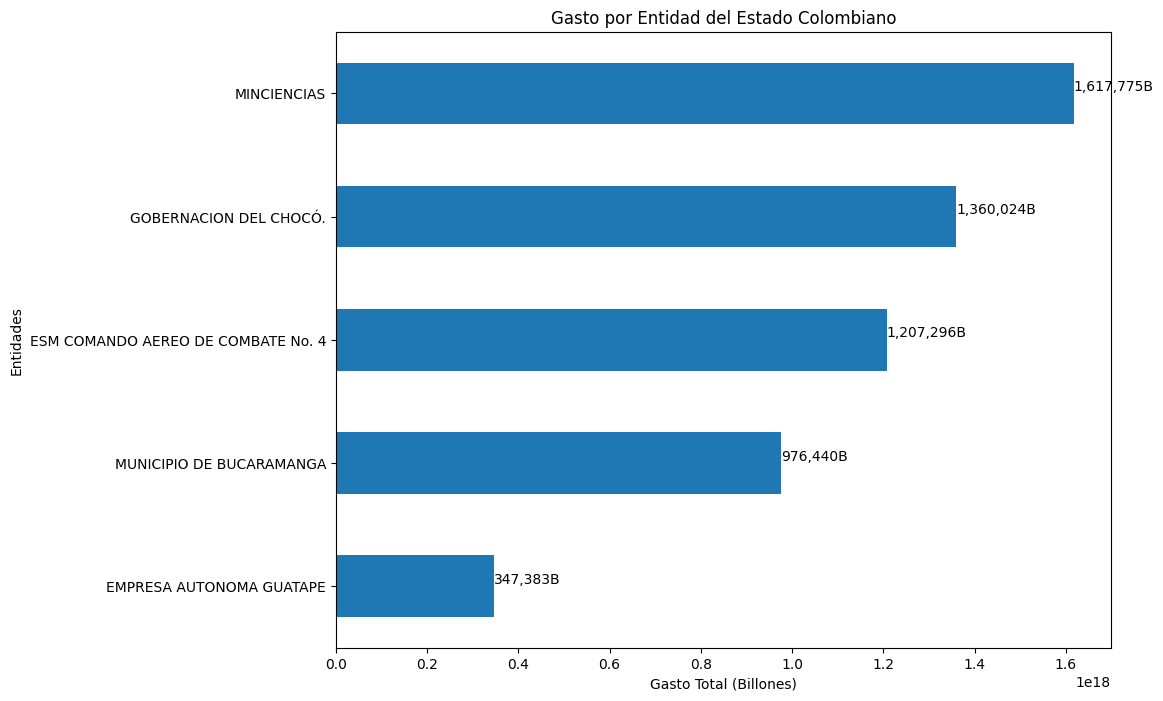

In [90]:
# Cálculo del Gasto por Entidad
gasto_entidad = df_filtrado.groupby('Entidad')['Valor Total Adjudicacion'].sum()
gasto_entidad = gasto_entidad.nlargest(5).sort_values()

# Verificar si hay resultados
if not gasto_entidad.empty:
    # Gráfica
    plt.figure(figsize=(10, 8))  # Ajuste del tamaño de la figura
    gasto_entidad.plot(kind='barh') 

    # Agregar los valores en cada barra
    for i, (entidad, gasto) in enumerate(gasto_entidad.items()):
        plt.text(gasto, i, f'{gasto/1e12:,.0f}B', ha='left', va='bottom')  # Texto con gasto en billones

    plt.title('Gasto por Entidad del Estado Colombiano')
    plt.xlabel('Gasto Total (Billones)')
    plt.ylabel('Entidades')
    plt.show()
else:
    print("No hay suficientes datos para generar la gráfica.")


### Precio Base

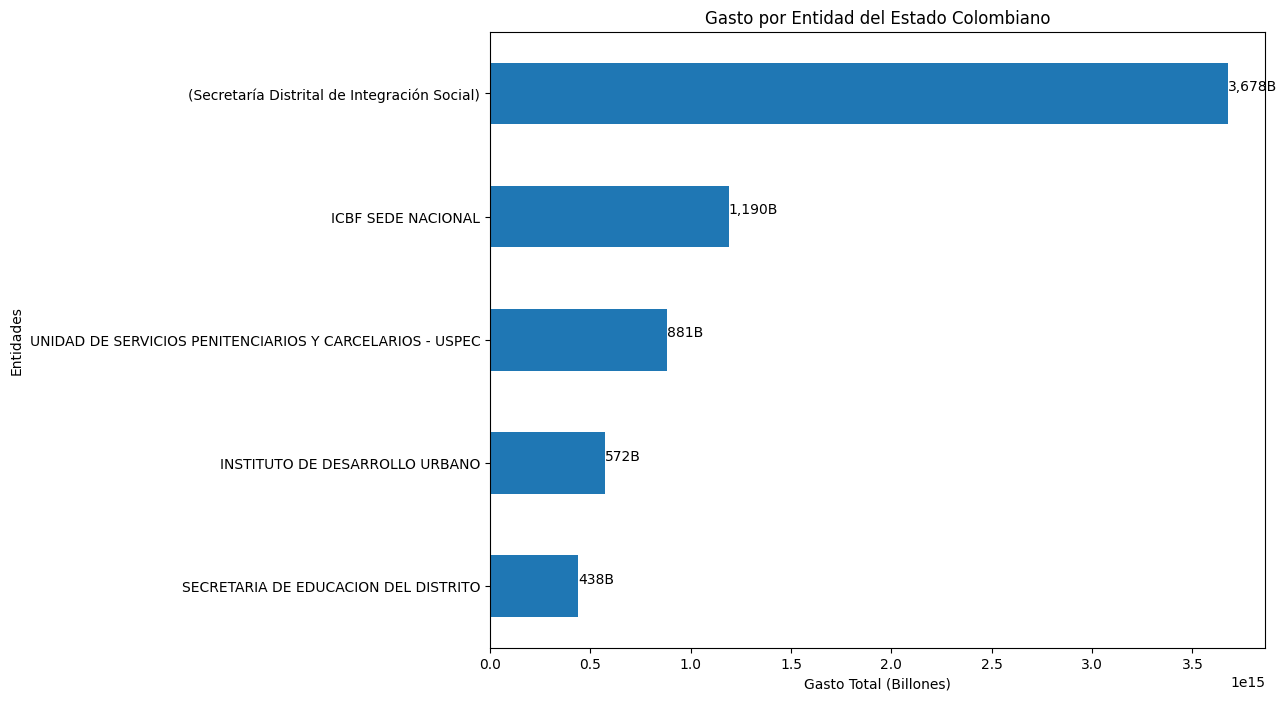

In [91]:
# Cálculo del Gasto por Entidad
gasto_entidad = df_filtrado.groupby('Entidad')['Precio Base'].sum()
gasto_entidad = gasto_entidad.nlargest(5).sort_values()

# Verificar si hay resultados
if not gasto_entidad.empty:
    # Gráfica
    plt.figure(figsize=(10, 8))  # Ajuste del tamaño de la figura
    gasto_entidad.plot(kind='barh') 

    # Agregar los valores en cada barra
    for i, (entidad, gasto) in enumerate(gasto_entidad.items()):
        plt.text(gasto, i, f'{gasto/1e12:,.0f}B', ha='left', va='bottom')  # Texto con gasto en billones

    plt.title('Gasto por Entidad del Estado Colombiano')
    plt.xlabel('Gasto Total (Billones)')
    plt.ylabel('Entidades')
    plt.show()
else:
    print("No hay suficientes datos para generar la gráfica.")


### 3. Inversión por Departamento
- Gráfica: Mapa de calor o mapa coroplético
- Descripción: Visualiza las regiones con mayor inversión.
- Datos necesarios: Monto invertido por región.

### Valor Total de Adjudicación

In [92]:
inversion_por_departamento = df_filtrado.groupby('Departamento Entidad')['Valor Total Adjudicacion'].sum().reset_index()
inversion_por_departamento = inversion_por_departamento.sort_values(by='Valor Total Adjudicacion', ascending=False)
inversion_por_departamento

,Departamento Entidad,Valor Total Adjudicacion
4,Bogotá D.C.,1712424875886062878
12,Chocó,1360026234181934231
30,Tolima,1267186429439340214
28,Santander,988585859455802891
1,Antioquia,683510271693827859
3,Atlántico,276522938898284676
13,Cundinamarca,155594651914456739
26,Risaralda,44429794398197286
6,Boyacá,37381004380620870
31,Valle del Cauca,36288780375137359


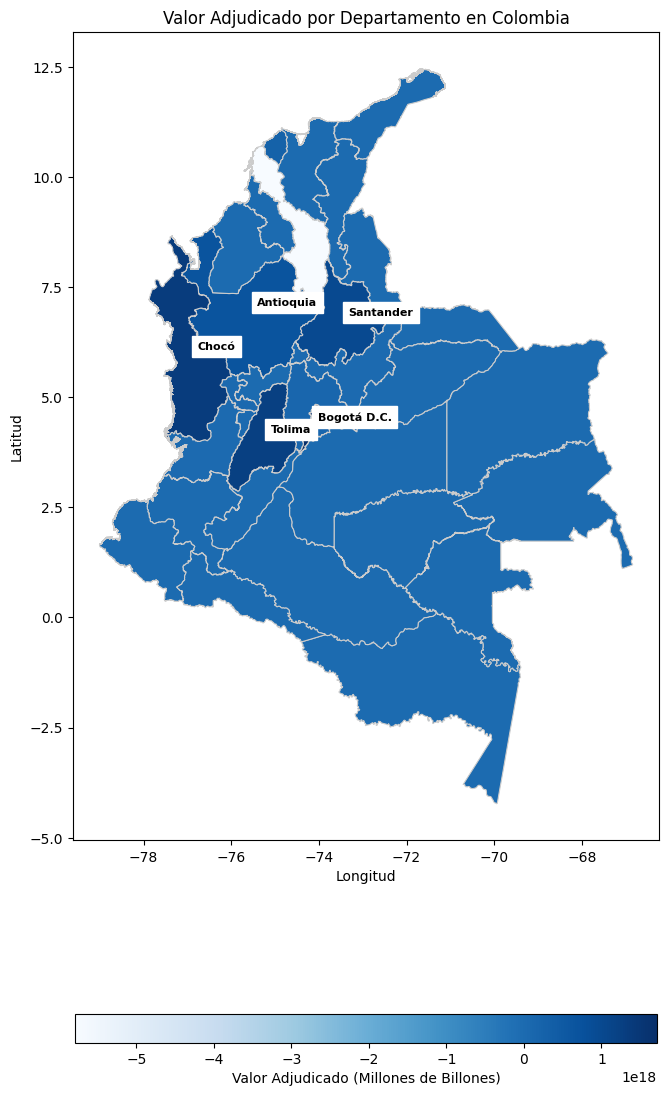

In [93]:
inversion_por_departamento = df_filtrado.groupby('Departamento Entidad')['Valor Total Adjudicacion'].sum().reset_index()

# Cargar el shapefile de los departamentos de Colombia
shapefile_path = 'C:\\Users\\cc_ca\\Downloads\\gadm41_COL_shp\\gadm41_COL_1.shp'  # Ajusta la ruta al archivo shapefile descargado
departamentos_geo = gpd.read_file(shapefile_path)# Paso 3: Unir los datos geoespaciales con los datos de inversión
departamentos_geo = departamentos_geo.merge(inversion_por_departamento, left_on='NAME_1', right_on='Departamento Entidad', how='left')
top_5_departamentos = inversion_por_departamento.nlargest(5, 'Valor Total Adjudicacion')

# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
departamentos_geo.plot(column='Valor Total Adjudicacion', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                       legend_kwds={'label': "Valor Adjudicado (Millones de Billones)",
                                    'orientation': "horizontal",
                                    'shrink': 0.5})

# Añadir anotaciones para los 5 departamentos con mayor valor adjudicado
for idx, row in departamentos_geo.iterrows():
    if row['Departamento Entidad'] in top_5_departamentos['Departamento Entidad'].values:
        plt.annotate(text=row['Departamento Entidad'],
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(5, 5),
                     textcoords="offset points",
                     fontsize=8,
                     color='black',
                     weight='bold',
                     backgroundcolor='white')

# Añadir título y etiquetas de los ejes
plt.title('Valor Adjudicado por Departamento en Colombia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()


### Precio Base

In [94]:
base_por_departamento = df_filtrado.groupby('Departamento Entidad')['Precio Base'].sum().reset_index()
base_por_departamento = base_por_departamento.sort_values(by='Precio Base', ascending=False)
base_por_departamento

,Departamento Entidad,Precio Base
4,Bogotá D.C.,8734869273247143
21,Nariño,67308270469870
1,Antioquia,65106529757384
28,Santander,34201601882001
3,Atlántico,30466268701591
13,Cundinamarca,29925250137091
31,Valle del Cauca,23924080254157
7,Caldas,13739290922831
5,Bolívar,9825252206026
17,Huila,9020873486664


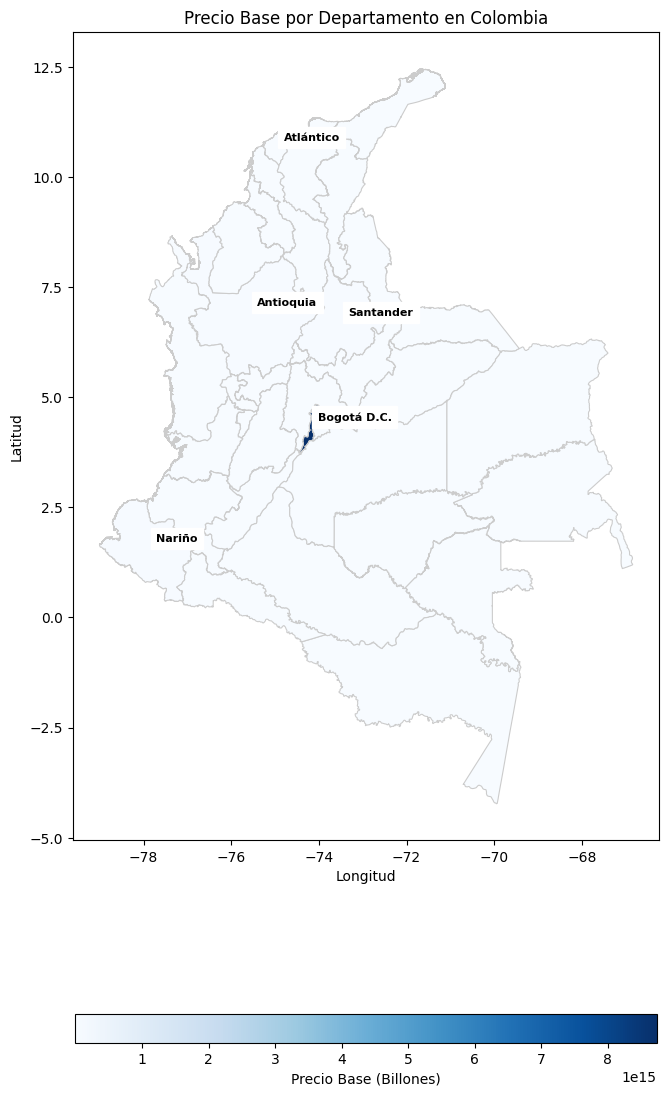

In [95]:
inversion_por_departamento = df_filtrado.groupby('Departamento Entidad')['Precio Base'].sum().reset_index()

# Cargar el shapefile de los departamentos de Colombia
shapefile_path = 'C:\\Users\\cc_ca\\Downloads\\gadm41_COL_shp\\gadm41_COL_1.shp'  # Ajusta la ruta al archivo shapefile descargado
departamentos_geo = gpd.read_file(shapefile_path)# Paso 3: Unir los datos geoespaciales con los datos de inversión
departamentos_geo = departamentos_geo.merge(inversion_por_departamento, left_on='NAME_1', right_on='Departamento Entidad', how='left')
top_5_departamentos = inversion_por_departamento.nlargest(5, 'Precio Base')

# Crear el mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
departamentos_geo.plot(column='Precio Base', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                       legend_kwds={'label': "Precio Base (Billones)",
                                    'orientation': "horizontal",
                                    'shrink': 0.5})

# Añadir anotaciones para los 5 departamentos con mayor valor adjudicado
for idx, row in departamentos_geo.iterrows():
    if row['Departamento Entidad'] in top_5_departamentos['Departamento Entidad'].values:
        plt.annotate(text=row['Departamento Entidad'],
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(5, 5),
                     textcoords="offset points",
                     fontsize=8,
                     color='black',
                     weight='bold',
                     backgroundcolor='white')

# Añadir título y etiquetas de los ejes
plt.title('Precio Base por Departamento en Colombia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()

### 4. Distribución del Gasto por Categoría de Contrato
- Gráfica: Pie o barra
- Descripción: Muestra en qué tipos de contratos se está gastando más.
- Eje X: Categoría de contrato
- Eje Y: Gasto Total

### Valor Total Adjudicado

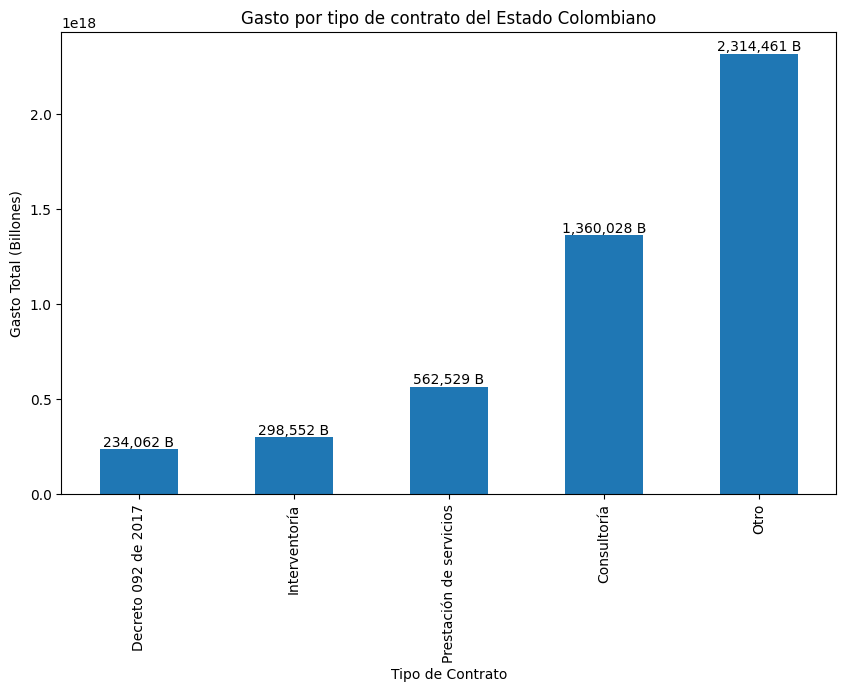

In [96]:
#Calculo distribucion del gasto por categoria de contrato
gasto_contrato = df_filtrado.groupby('Tipo de Contrato')['Valor Total Adjudicacion'].sum()
gasto_contrato = gasto_contrato.nlargest(5).sort_values()

#Grafica
plt.figure(figsize=(10, 6))
gasto_contrato.plot(kind='bar')

# Agregar los valores en cada barra
for index, value in enumerate(gasto_contrato):
    plt.text(index, value, f'{value/1e12:,.0f} B', ha='center', va='bottom')

plt.title('Gasto por tipo de contrato del Estado Colombiano')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Total (Billones)')
plt.show()

### Precio Base

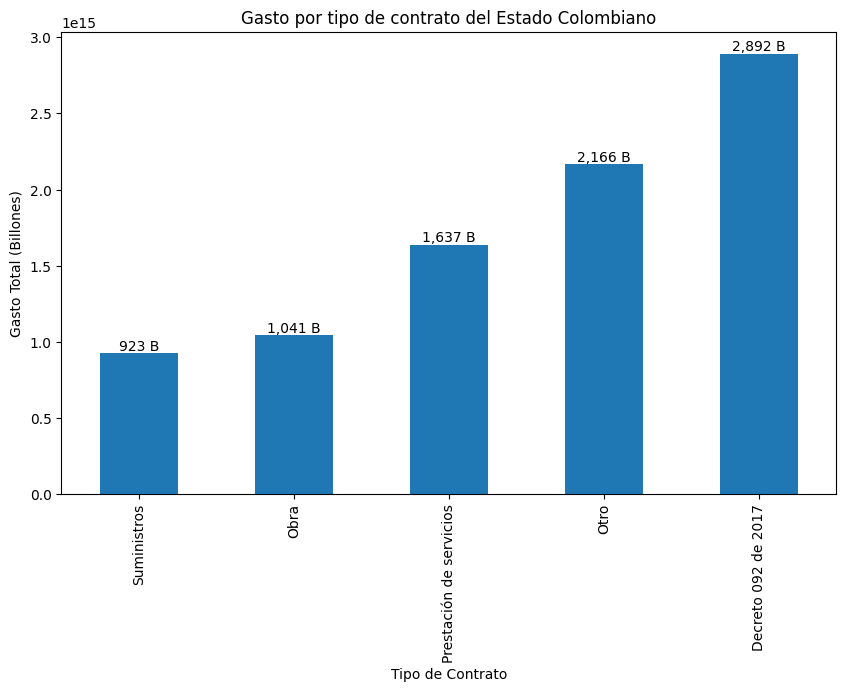

In [97]:
#Calculo distribucion del gasto por categoria de contrato
gasto_contrato = df_filtrado.groupby('Tipo de Contrato')['Precio Base'].sum()
gasto_contrato = gasto_contrato.nlargest(5).sort_values()

#Grafica
plt.figure(figsize=(10, 6))
gasto_contrato.plot(kind='bar')

# Agregar los valores en cada barra
for index, value in enumerate(gasto_contrato):
    plt.text(index, value, f'{value/1e12:,.0f} B', ha='center', va='bottom')

plt.title('Gasto por tipo de contrato del Estado Colombiano')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Gasto Total (Billones)')
plt.show()

### 5. Número de Contratos por Año
- Gráfica: Línea o barra
- Descripción: Muestra la cantidad de contratos firmados cada año.
- Eje X: Años
- Eje Y: Número de contratos

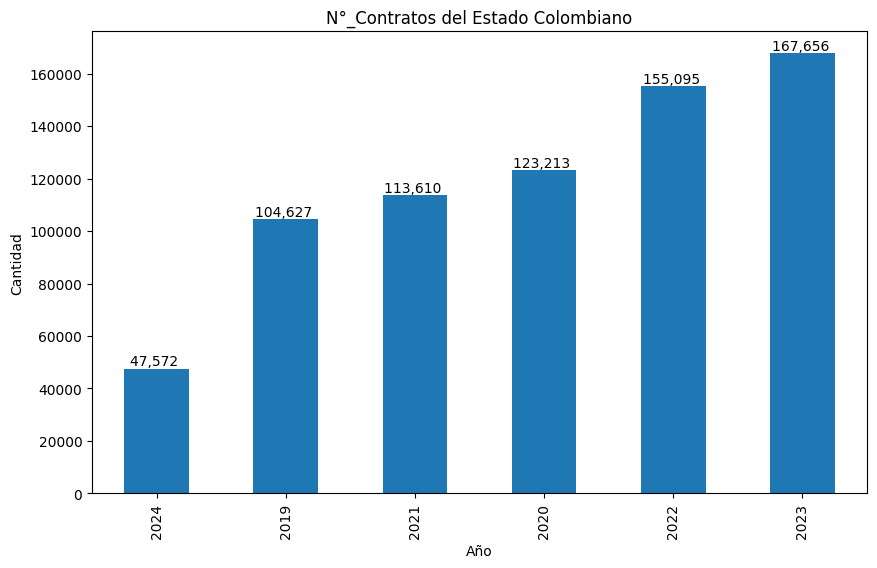

In [98]:
#Calculo numero de contratos por año
numero_contrato_año = df_filtrado.groupby('Año')['Año'].value_counts()
numero_contrato_año = numero_contrato_año.sort_values()

#Grafica
plt.figure(figsize=(10, 6))
numero_contrato_año.plot(kind='bar')

# Agregar los valores en cada barra
for index, value in enumerate(numero_contrato_año):
    plt.text(index, value, f'{value:,.0f} ', ha='center', va='bottom')

plt.title('N°_Contratos del Estado Colombiano')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

#Puntuacion de los numeros.

### 6. Top Proveedores por Valor Total de Contratos
- Gráfica: Barra horizontal
- Descripción: Identifica a los proveedores que han recibido mayores contratos.
- Eje X: Valor total de contratos
- Eje Y: Proveedores (los más significativos, p.ej., top 10)

### Valor Total Adjudicación

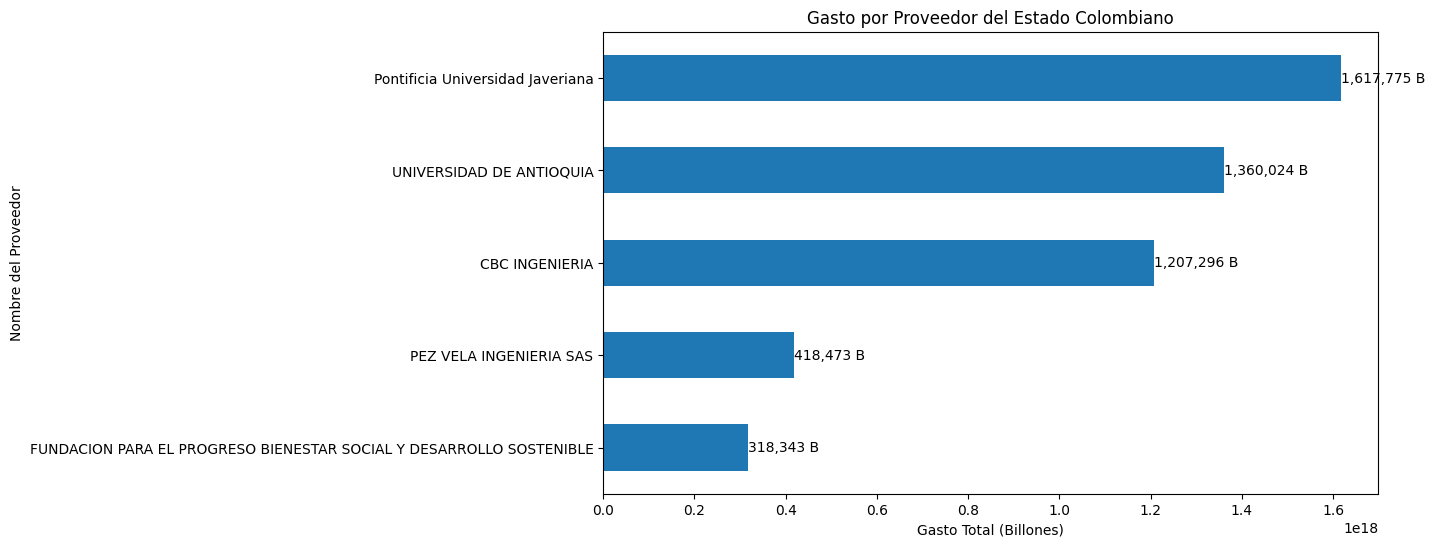

In [99]:
#Calculo Top proveedores por valor total de contratos.
total_proveedor = df_filtrado.groupby('Nombre del Proveedor Adjudicado')['Valor Total Adjudicacion'].sum()
total_proveedor = total_proveedor.nlargest(5).sort_values()

#Grafica
plt.figure(figsize=(10, 6))
total_proveedor.plot(kind='barh')

# Agregar los valores en cada barra
for index, value in enumerate(total_proveedor):
    plt.text(value, index, f'{value/1e12:,.0f} B', ha='left', va='center')

# Título y etiquetas de los ejes
plt.title('Gasto por Proveedor del Estado Colombiano')
plt.xlabel('Gasto Total (Billones)')
plt.ylabel('Nombre del Proveedor')
plt.show()

### Precio Base

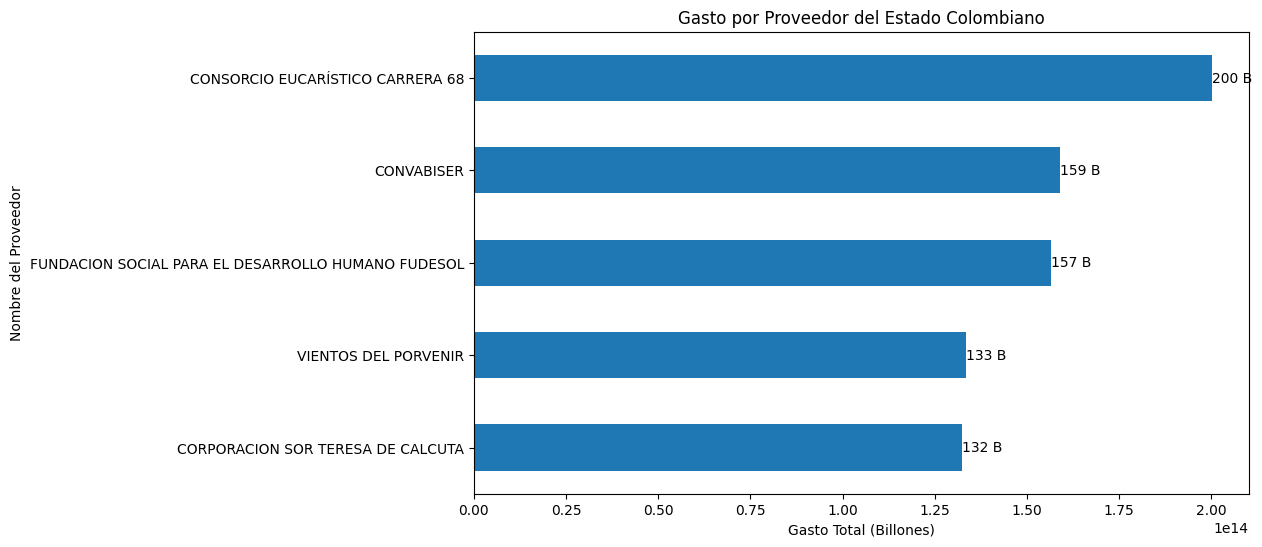

In [102]:
#Calculo Top proveedores por valor total de contratos.
total_proveedor = df_filtrado.groupby('Nombre del Proveedor Adjudicado')['Precio Base'].sum()
total_proveedor = total_proveedor.nlargest(5).sort_values()

#Grafica
plt.figure(figsize=(10, 6))
total_proveedor.plot(kind='barh')

# Agregar los valores en cada barra
for index, value in enumerate(total_proveedor):
    plt.text(value, index, f'{value/1e12:,.0f} B', ha='left', va='center')

# Título y etiquetas de los ejes
plt.title('Gasto por Proveedor del Estado Colombiano')
plt.xlabel('Gasto Total (Billones)')
plt.ylabel('Nombre del Proveedor')
plt.show()

### 7. Duración de los Contratos por Tipo
- Gráfica: Barras
- Descripción: Compara la duración de los contratos entre diferentes tipos de contratos.
- Eje X: Tipo de Contrato
- Eje Y: Duración en Horas

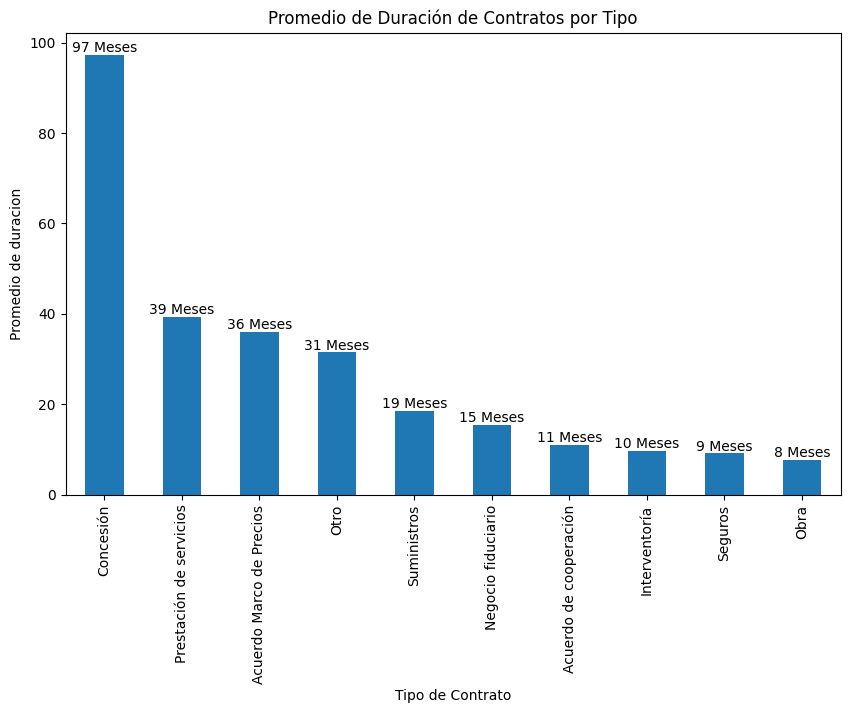

In [103]:
# Calcular el promedio de duración total de cada tipo de contrato
promedio_duracion_por_tipo = df_filtrado.groupby('Tipo de Contrato')['Duracion_Meses_Contrato'].mean()
promedio_duracion_por_tipo = promedio_duracion_por_tipo.nlargest(10)
plt.figure(figsize=(10, 6))
promedio_duracion_por_tipo.plot(kind='bar')
plt.title('Promedio de Duración de Contratos por Tipo')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Promedio de duracion')
plt.xticks(rotation=90)

# Agregar valores en barras
for i, v in enumerate(promedio_duracion_por_tipo):
    plt.text(i, v, f'{v:,.0f} Meses', ha='center', va='bottom')

plt.show()

### 8.Cantidiad por Estado del Proncedimiento
- Gráfica: Barras
- Descripción: Muestra la cantidad de contratos por Estado del procedimiento
- Eje X: Estado del Procedimiento
- Eje Y: Cantidad de Contratos
 

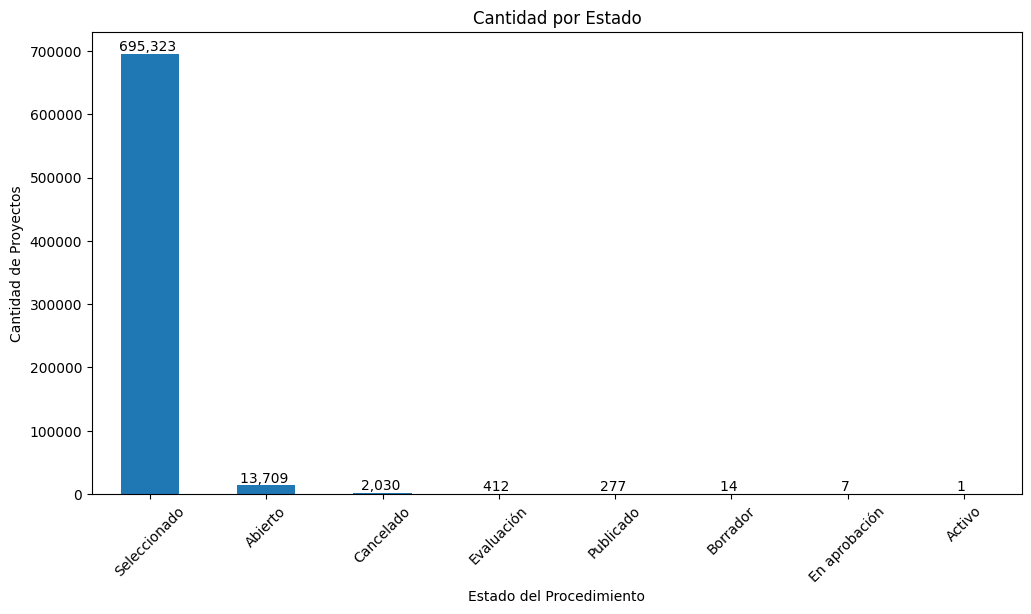

In [104]:
# Calcular la cantidad de procedimientos por estado del procedimiento
cantidad_por_estado = df_filtrado['Estado del Procedimiento'].value_counts()

plt.figure(figsize=(12, 6))
cantidad_por_estado.plot(kind='bar')
plt.title('Cantidad por Estado')
plt.xlabel('Estado del Procedimiento')
plt.ylabel('Cantidad de Proyectos')
plt.xticks(rotation=45)

# Agregar los valores en cada barra
for index, value in enumerate(cantidad_por_estado):
    plt.text(index, value, f'{value:,.0f} ', ha='center', va='bottom')

plt.show()

### 9. Porcentaje de contratos adjudicados
- Grafico pie

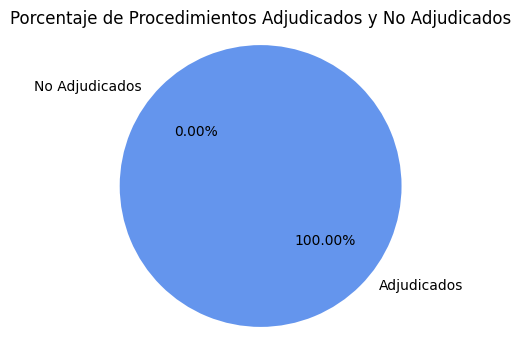

In [105]:
# Contar la cantidad de procedimientos adjudicados y no adjudicados
cantidad_adjudicados = (df_filtrado['Adjudicado'] == 'Si').sum()
cantidad_no_adjudicados = (df_filtrado['Adjudicado'] == 'No').sum()

# Calcular el porcentaje de procedimientos adjudicados y no adjudicados
porcentaje_adjudicados = (cantidad_adjudicados / len(df_filtrado)) * 100
porcentaje_no_adjudicados = (cantidad_no_adjudicados / len(df_filtrado)) * 100

# Colores para los sectores del gráfico
colors = ['cornflowerblue', 'lightsteelblue']

# Crear el gráfico de pastel
plt.figure(figsize=(4, 4))
plt.pie([porcentaje_adjudicados, porcentaje_no_adjudicados], labels=['Adjudicados', 'No Adjudicados'], autopct='%.2f%%', startangle=140, colors=colors)
plt.title('Porcentaje de Procedimientos Adjudicados y No Adjudicados')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()


### EDA estadistica

In [110]:
df_filtrado_corr = df_filtrado
df_filtrado_corr.columns

Index(['Entidad', 'Nit Entidad', 'Departamento Entidad', 'Ciudad Entidad',
       'OrdenEntidad', 'Referencia del Proceso', 'Fase',
       'Fecha de Publicacion del Proceso', 'Precio Base',
       'Modalidad de Contratacion', 'Ciudad de la Unidad de Contratación',
       'Estado del Procedimiento', 'ID Estado del Procedimiento', 'Adjudicado',
       'ID Adjudicacion', 'CodigoProveedor', 'Departamento Proveedor',
       'Ciudad Proveedor', 'Valor Total Adjudicacion',
       'Nombre del Proveedor Adjudicado', 'NIT del Proveedor Adjudicado',
       'Codigo Principal de Categoria', 'Estado de Apertura del Proceso',
       'Tipo de Contrato', 'Estado Resumen', 'Duracion_Meses_Contrato', 'Año'],
      dtype='object')

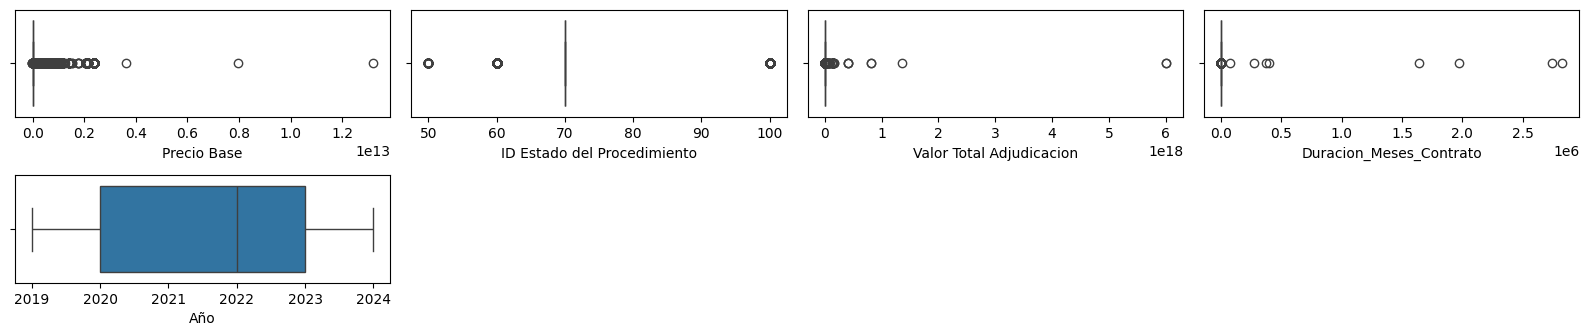

In [107]:
#Identificar valores atipicos en los valores numéricas
numeric_cols = df_filtrado_corr.select_dtypes(include=['int','float']).columns
plt.figure(figsize=(16,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5,4,i)
    sns.boxplot(data=df_filtrado_corr,x=col)
plt.tight_layout()
plt.show()

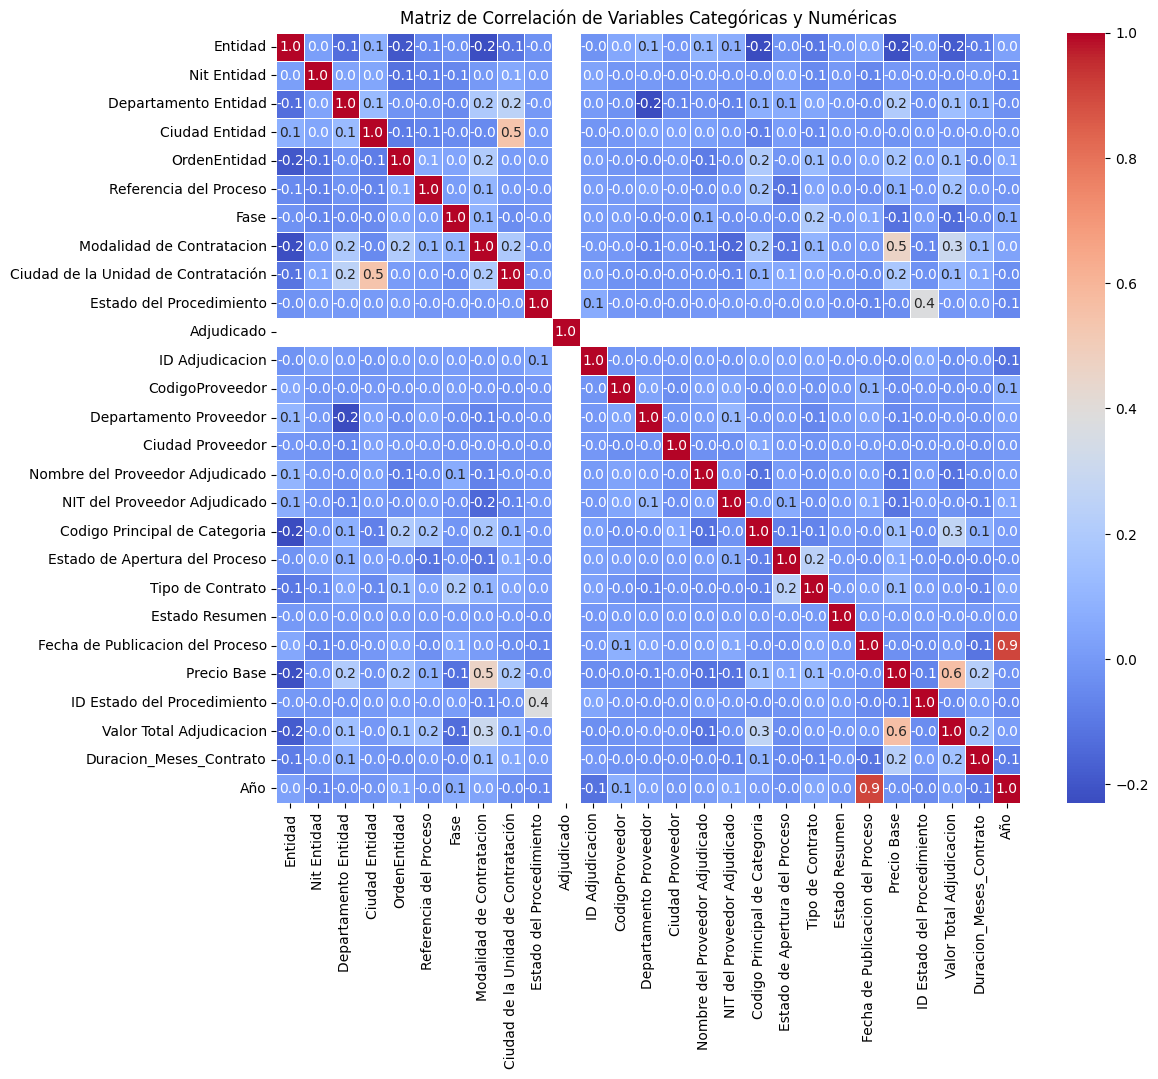

In [111]:
# Seleccionar variables categóricas
categorical_vars = ['Entidad','Nit Entidad','Departamento Entidad','Ciudad Entidad','OrdenEntidad','Referencia del Proceso',
                    'Fase', 'Modalidad de Contratacion', 'Ciudad de la Unidad de Contratación','Estado del Procedimiento',
                    'Adjudicado','ID Adjudicacion','CodigoProveedor', 'Departamento Proveedor', 'Ciudad Proveedor', 'Nombre del Proveedor Adjudicado',
                    'NIT del Proveedor Adjudicado','Codigo Principal de Categoria', 'Estado de Apertura del Proceso', 'Tipo de Contrato', 'Estado Resumen']

# Convertir todas las variables categóricas a cadenas de texto
df_filtrado_corr[categorical_vars] = df_filtrado_corr[categorical_vars].astype(str)

# Convertir variables categóricas a valores numéricos
label_encoder = LabelEncoder()
for var in categorical_vars:
    df_filtrado_corr[var] = label_encoder.fit_transform(df_filtrado_corr[var])

# Seleccionar variables numéricas
numeric_vars = ['Fecha de Publicacion del Proceso','Precio Base', 'ID Estado del Procedimiento', 'Valor Total Adjudicacion','Duracion_Meses_Contrato',
                'Año']

# Calcular la matriz de correlación entre variables categóricas y numéricas
correlation_matrix = df_filtrado_corr[categorical_vars + numeric_vars].corr(method='kendall')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de Variables Categóricas y Numéricas')

# Mostrar el mapa de calor
plt.show()

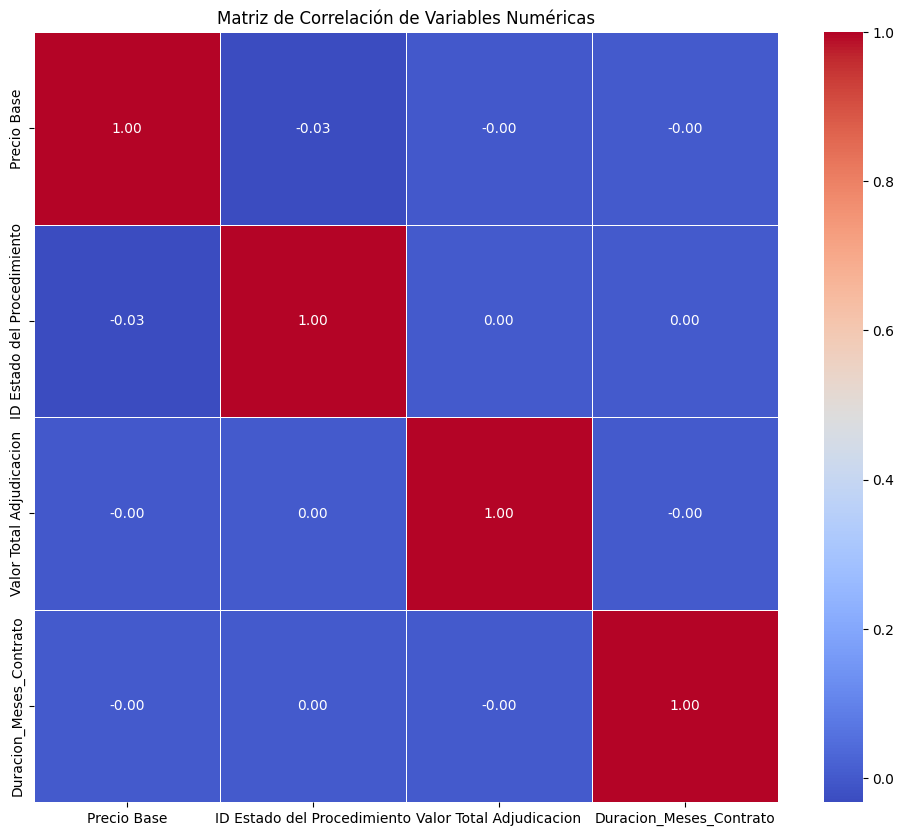

In [109]:
# Seleccionar solo las columnas numéricas
numeric_data = df_filtrado_corr.select_dtypes(include=['float64','int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de Variables Numéricas')

# Mostrar el mapa de calor
plt.show()

Conocer el presente y el pasado de esa data.